## Milestone 2: Data Exploration and Initial Preprocessing

In [67]:
# Contains all of the imports necessary for data exploration

#First pip install all libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

#Clone the repository
!git clone https://github.com/dregmi08/Milestone-2-Data-Exploration-Initial-Preprocessing.git

#Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
fatal: destination path 'Milestone-2-Data-Exploration-Initial-Preprocessing' already exists and is not an empty directory.


## Basic Exploration of Data, Dropping Features, Exploring Null Values, Finding Mean/Median/Statistics related to numerical data

In [68]:
#Create new virual space so we can install spacy
!python -m venv spacy_env
!source spacy_env/bin/activate
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

zsh:1: command not found: python
zsh:source:1: no such file or directory: spacy_env/bin/activate

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: python


In [69]:
# Import the Spotify dataset using pandas
spotify_df = pd.read_csv('Milestone-2-Data-Exploration-Initial-Preprocessing/reviews.csv')

# Printing shape of the spotify dataframe, this tells us that we have 61,594 observations and 5 features
print("Printing shape upon reading from the dataframe", spotify_df.shape)

# Printing what features we have in our dataset
print("Printing all the unique features:", spotify_df.columns)

# Print summary of data
print("Printing description about the numerical features:", spotify_df.describe())

# See if we have any null values/missing data 
# First see which columns have any null values
print(spotify_df.isnull().any())

# Since we see that the reply column does have null data, let's see how many null values exist in the reply column
print("Printing number of null entries for the Reply feature:", spotify_df['Reply'].isnull().sum())

# We have a ton of null data in the reply category (61378/61594 of the observations have a null value for the reply)
# We are dropping the reply feature from the dataset for the following reasons:
# 
# 1. Limited Contribution: Only 216 of 61,594 observations contain non-null values for this feature, meaning 99.6% of observations are null. 
#    With such a high degree of missingness, this feature is unlikely to add significant value to our model, and removing it will streamline our dataset.
# 
# 2. Textual Data and Noise Risk: Filling in missing data for 61k+ observations would introduce excessive noise, particularly because the feature 
#    contains text, which is challenging to impute meaningfully without bias.
# 
# 3. Low Relevance: The replies largely consist of generic comments from the Spotify team asking for improvement ideas, information which is already 
#    covered in the original review feature. As a result, this feature is redundant and does not enhance the dataset.

# Drop the feature
spotify_df = spotify_df.drop(columns = ['Reply'])

# Sanity check number of features and shape after dropping
print("Columns after dropping reply column:", spotify_df.columns)
print("Shape of data frame after dropping reply column:", spotify_df.shape)

# We are also dropping the Time_submitted column of the dataset:
# 
# 1. The Time_submitted column does not contribute much to what we're trying to find. Our project focuses on classifying reviews in 
# categories: "Positive", "Negative"(we are definitely doing these categories), "Slightly Positive", "Slightly Negative", "Neutral"
# (we might also classify reviews into these categories) and ranking what features/problems can be improved about Spotify from most important
# (most frequently complained about) to least important. The time a review was submitted doesn't give us any relevant information here,
# so we're going to drop it.
# 

# Drop the Time_submitted
spotify_df = spotify_df.drop(columns = ['Time_submitted'])

# Sanity check number of features and shape after dropping
print("Columns after dropping time submitted column:", spotify_df.columns)
print("Shape of data frame after dropping time submitted column:", spotify_df.shape)

# In conclusion, we are keeping three features in our dataset, Review (the text review a user submits), Total_thumbsup (the number of
# thumbs up a review received), 'Rating', number of stars the user gave along with the review. The Rating and the Total_thumbsup are both
# numerical data, and the Review is textual

Printing shape upon reading from the dataframe (61594, 5)
Printing all the unique features: Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')
Printing description about the numerical features:              Rating  Total_thumbsup
count  61594.000000    61594.000000
mean       3.155989        7.649381
std        1.673285       89.323143
min        1.000000        0.000000
25%        1.000000        0.000000
50%        3.000000        0.000000
75%        5.000000        1.000000
max        5.000000     8195.000000
Time_submitted    False
Review            False
Rating            False
Total_thumbsup    False
Reply              True
dtype: bool
Printing number of null entries for the Reply feature: 61378
Columns after dropping reply column: Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup'], dtype='object')
Shape of data frame after dropping reply column: (61594, 4)
Columns after dropping time submitted column: Index(['Review', 'Rating', '

## Plotting of Numerical Data, Thumbs Up and Rating Feature

<Figure size 1200x600 with 0 Axes>

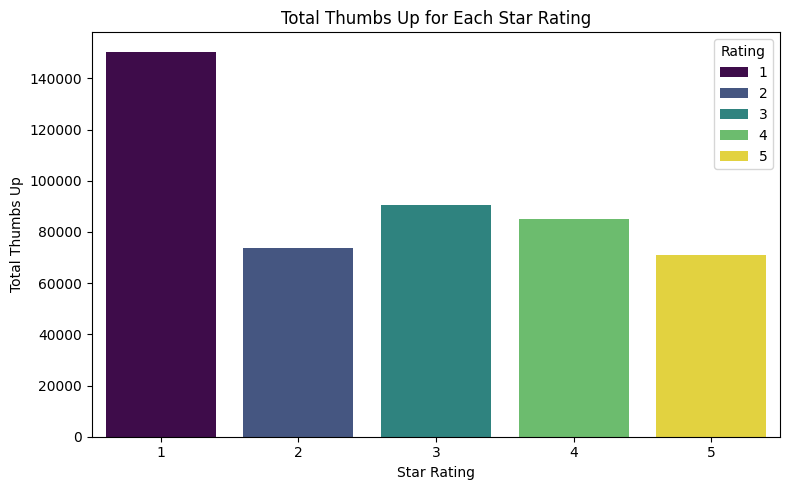

<Figure size 800x500 with 0 Axes>

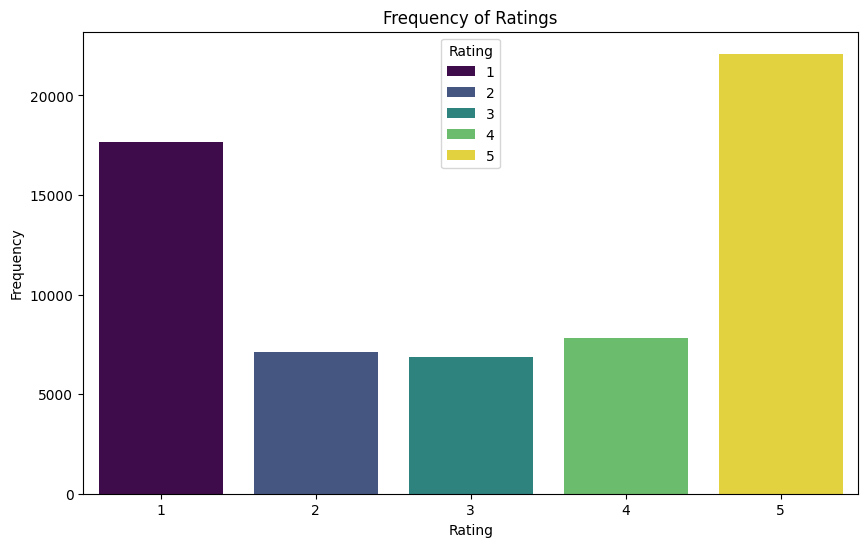

In [70]:
# OVERVIEW: To plot our numerical data, we are going to plot two things: 
    # 1. The number of thumbs up reviews get for each star rating
    # 2. The number of reviews corresponding to each rating
# The goal here is just to understand what the distributions are: Do we have equal distributions among all star ratings? Or do we have a bimodal distribution with peaks at 1 and 5 stars?
# How many people agree with each star rating based on the thumbs up?

plt.figure(figsize=(12, 6))

# Get the thumbs up for each rating
thumbs_up_by_rating = spotify_df.groupby('Rating')['Total_thumbsup'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(8, 5))

# Bar plot for total thumbs up by star rating
sns.barplot(data=thumbs_up_by_rating, x='Rating', y='Total_thumbsup', palette='viridis', hue = 'Rating')

# Set plot titles and labels
plt.title('Total Thumbs Up for Each Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Total Thumbs Up')
plt.xticks(rotation=0) 
plt.tight_layout()

# Display the plot
plt.show()

# Plot for Ratings

plt.figure(figsize=(8, 5))

# Calculate the frequency of each rating
rating_counts = spotify_df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Frequency'] 

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_counts, x ='Rating', y ='Frequency', palette = 'viridis', hue = 'Rating')

# Adding titles and labels
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Plotting of Review Textual Data, word frequency plotting for each rating

In [71]:
# OVERVIEW: What we are going to essentially be doing in this code block is to find the top 20 words by frequency in each rating. Users who left reviews left a textual review as well as a star rating
# from 1-5 stars, and we are going to split all of our reviews into 1, 2, 3, 4, and 5 stars. From here, we are going to find the top 20 words that appear in reviews the most for each star rating
# Before we calculate the top 20 words, we need to filter out words that don't add much value to reviews, these are called stop words, and examples of these are 'a','an', 'the', 'in', 'on', 'at', etc.

# Import spacy, an open source library for natural language processing
import spacy

# Separate reviews by ratings
one_star_reviews = spotify_df.loc[spotify_df['Rating'] == 1, 'Review']
two_star_reviews = spotify_df.loc[spotify_df['Rating'] == 2, 'Review']
three_star_reviews = spotify_df.loc[spotify_df['Rating'] == 3, 'Review']
four_star_reviews = spotify_df.loc[spotify_df['Rating'] == 4, 'Review']
five_star_reviews = spotify_df.loc[spotify_df['Rating'] == 5, 'Review']

# Combine reviews into a single string for each rating
reviews_strings = [
    ' '.join(one_star_reviews),
    ' '.join(two_star_reviews),
    ' '.join(three_star_reviews),
    ' '.join(four_star_reviews),
    ' '.join(five_star_reviews)
]

# Load the English model in SpaCy and configure without parser or NER as we don't need them for what we're doing
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Function to split text into manageable chunks (spacy will complain if you don't split the data into manageable chunks because our dataset is large)
# this function processes the text chunk that you pass it 
def chunk_text(text, chunk_size = 500_000):
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

# Tokenize and filter each review string by chunking, this array will keep track of the tokenized reviews for each star
filtered_tokenized_reviews = []

# For each review string
for review_string in reviews_strings:
    
    # local var to keep track of the tokens we want to keep so far
    chunked_tokens = []

    # for each chunk in the review string
    for chunk in chunk_text(review_string.lower()):
        
        # process the chunk
        doc = nlp(chunk)

        # we are going to be appending multiple tokens(words) to the chunked token array
        chunked_tokens.extend(
            #for every token in the doc
            token.text for token in doc

            # if the token not a stop word and no a punctuation mark, then we will append it to our chunked tokens array
            if not token.is_stop and not token.is_punct
        )

    # append the tokens for every single chunk in the review string to our 'filtered_tokenized_reviews' array
    filtered_tokenized_reviews.append(chunked_tokens)

# Calculate word frequencies for each rating's reviews
word_counts_by_rating = [Counter(tokens) for tokens in filtered_tokenized_reviews]

# Define a dictionary that will store the top 20 words by frequency for every rating
top20_per_rating = {}

# Map the string "*number* star" to the 20 most common words for that rating, do this for every rating
for i, word_count in enumerate(word_counts_by_rating, start=1):
    top20_per_rating[f"{i}-star"] = word_count.most_common(20)

## Plotting Top 20 Word Frequencies for each Star Rating

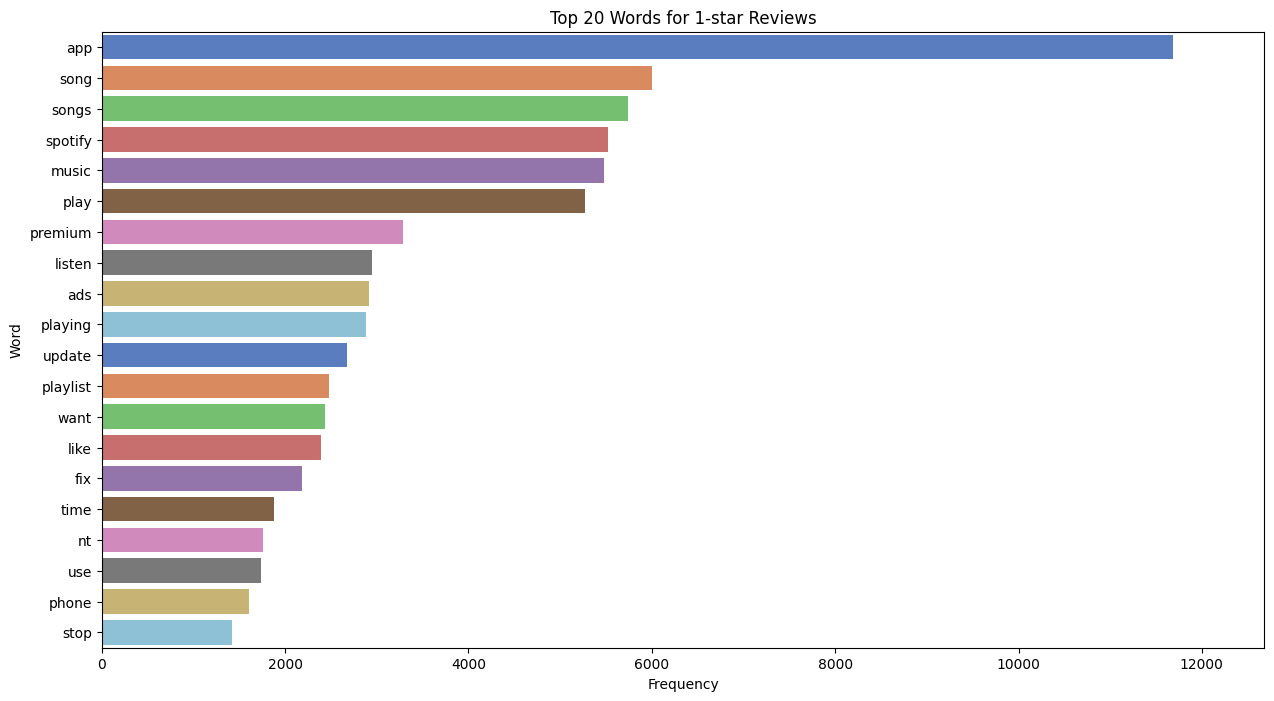

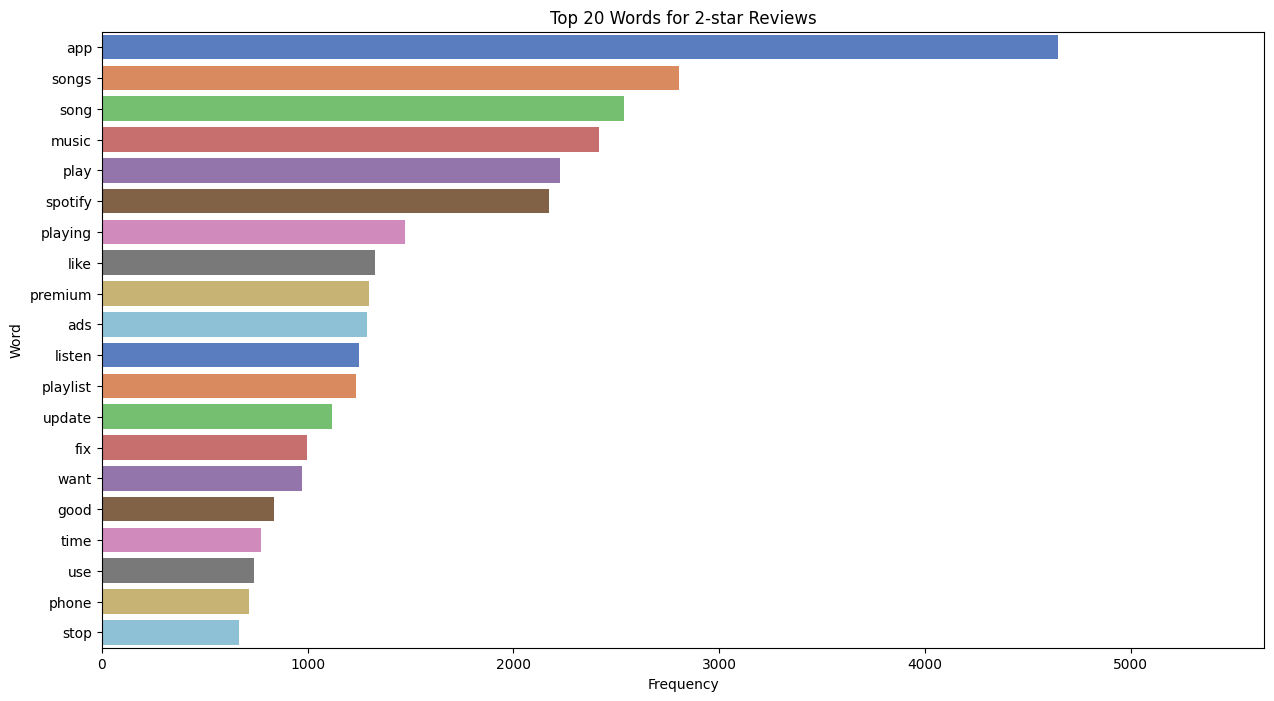

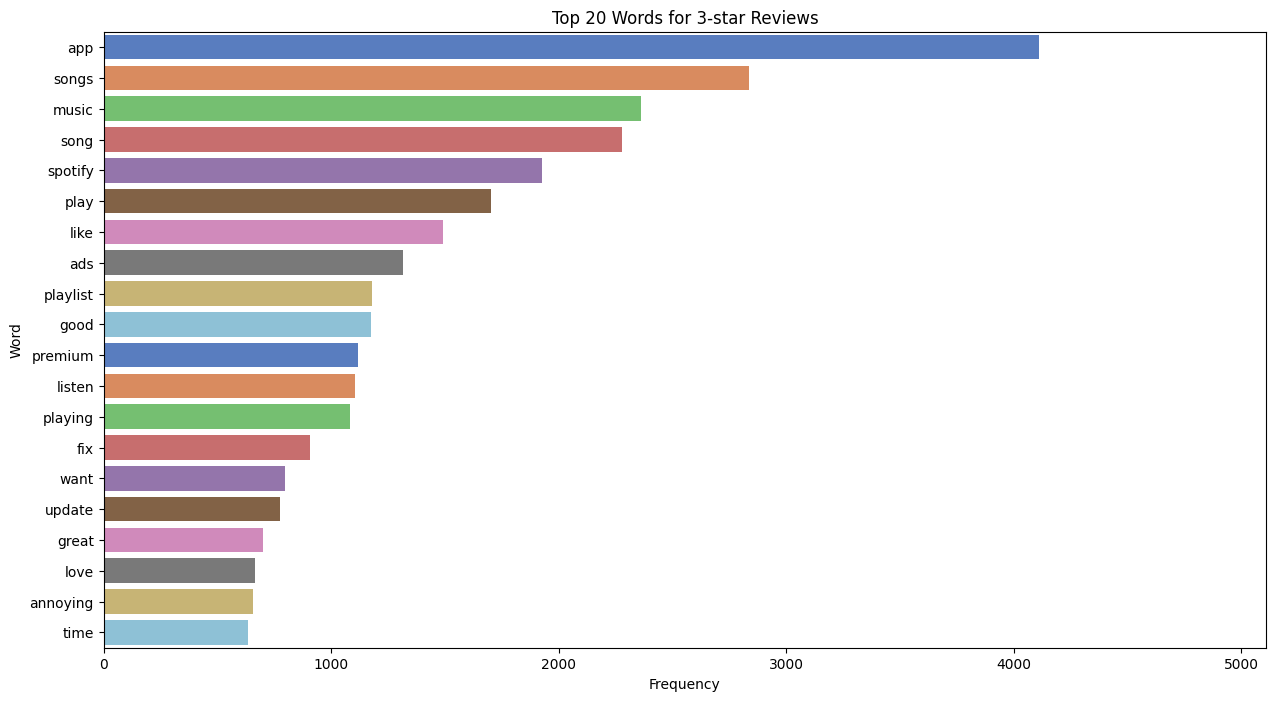

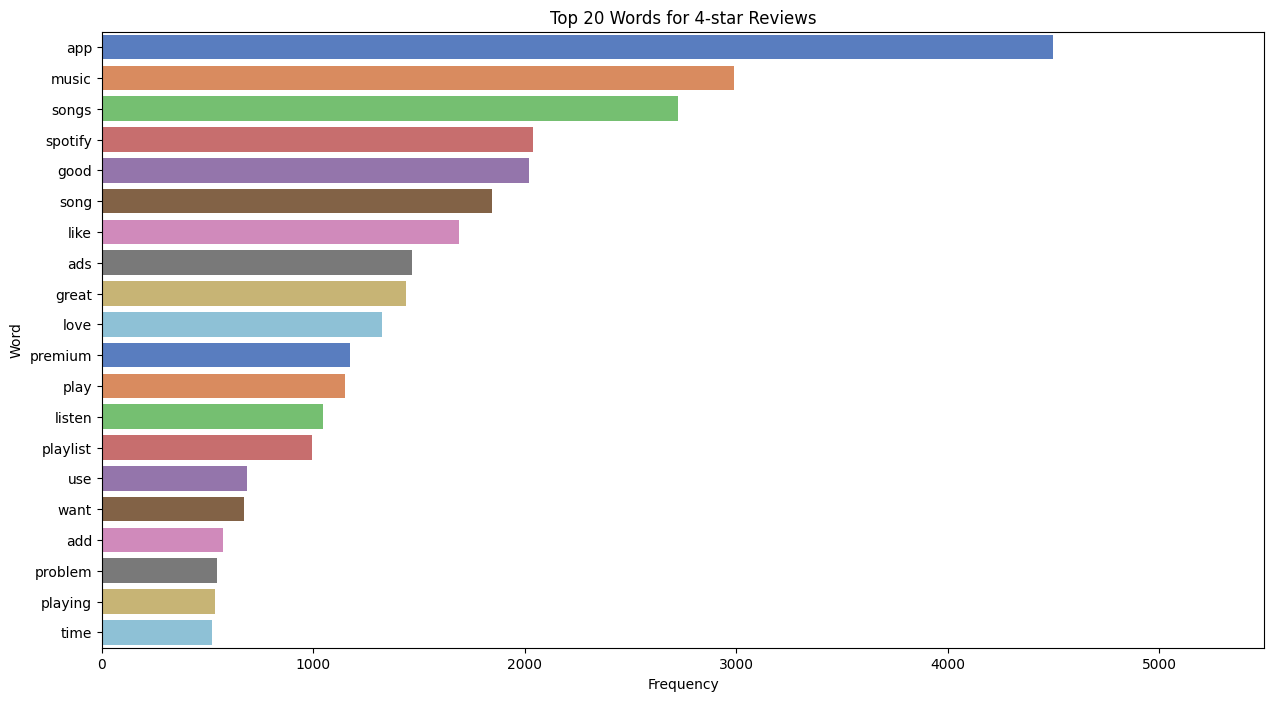

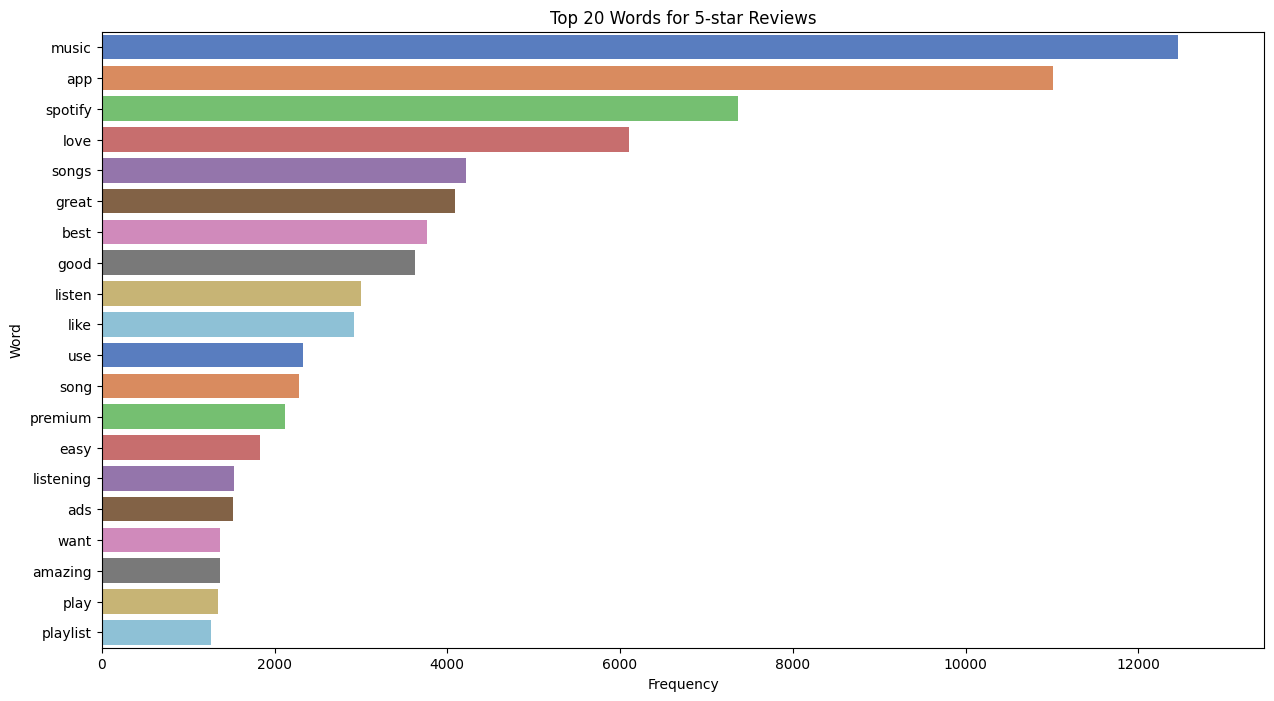

In [72]:
# Create separate plots for each rating
for rating, words in top20_per_rating.items():
    # Create a DataFrame for the current rating
    df = pd.DataFrame(words, columns=['Word', 'Frequency'])
    
    # Create a bar plot to plot word frequency for 1-5 stars
    plt.figure(figsize=(15, 8))
    sns.barplot(data=df, x='Frequency', y='Word', palette='muted', hue='Word')
    plt.title(f'Top 20 Words for {rating} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.xlim(0, df['Frequency'].max() + 1000)
    plt.show()